# Titanic Survivors - An exercise in machine learning

**CS 634  - Prof. Pantelis Monogioudis**

**Lee Zhang, Imran Hashmi, Jalaj Sharmat**

We will utilize the methods of machine learning to predict survivors of the Titanic disaster based on the passenger features. While the Ames Housing Data was based on linear regression to predict a price value, this exercise is one of categorization, specifically binary classification. This project as an applied exercise in data engineering and data science, specifically utilising the tools of feature selection, feature engineering, and modeling through classification. While we explore a number of different methodologies, we found the following techniques to have the highest yield:

1. Feature selection & data imputation - Filling in missing values, which can effectively improve the score. We drop cabin due to its many missing values and impute the Age. We impute embarked using Class and ticket price
2. Feature engineering - We utilize encode the the text data for Sex and Embarked into integer values that allow us to categorize them.
3. Classification modeling - We try seven different classification models provided by the Scikit library and found that Random Forest works the best. 

## Importing Main Libraries

For users running the notebook for the first time, we need to update seaborn to version 0.9.0. If the notebook is going to be run multiple times in the same runtime, then the pip3 command can be commented out. Seaborn will be used for data visualization and plotting.


In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
!pip3 install seaborn --upgrade
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


Here we upload the file. Note that for running the whole notebook we need to upload two files, "train.csv" and "test.csv"

In [0]:
training = pd.read_csv('../content/train.csv')
testing =  pd.read_csv('../content/test.csv')

In [3]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
testing.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
training.head()

## Filling in Missing Values and Data Imputation

We are checking to see how many null values we have in our training and testing data and will separately print both training and testing file columns to see how many values are present or missing.

In [5]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Above we find that most of null values are missing from cabin and age in both training and testing file. Two values are missing in Embark in training datasets.

We also have value which are in text or string format but we need to remove those value and replace them with numerical value. 

1) For sex we have male and female so we will replace male with "0" and Female with "1" in training and testing dataframes. 

2) In Embarked column we replace embarked points S="0", C="1", Q="2".

In [0]:
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2

In [7]:
training.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
107,108,1,3,"Moss, Mr. Albert Johan",0,NaN,0,0,312991,7.7750,NaN,0
683,684,0,3,"Goodwin, Mr. Charles Edward",0,14.0,5,2,CA 2144,46.9000,NaN,0
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.0,0,2,2653,15.7417,NaN,1
786,787,1,3,"Sjoblom, Miss. Anna Sofia",1,18.0,0,0,3101265,7.4958,NaN,0
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",1,36.0,1,2,113760,120.0000,B96 B98,0
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",1,31.0,1,1,363291,20.5250,NaN,0
448,449,1,3,"Baclini, Miss. Marie Catherine",1,5.0,2,1,2666,19.2583,NaN,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",0,54.0,1,0,244252,26.0000,NaN,0
417,418,1,2,"Silven, Miss. Lyyli Karoliina",1,18.0,0,2,250652,13.0000,NaN,0
273,274,0,1,"Natsch, Mr. Charles H",0,37.0,0,1,PC 17596,29.7000,C118,1


We decided to drop the columns for Cabin and Ticket. Cabin had a lot of null values which would be to time consuming to accurately predict and we felt offered little return value. As for Ticket, the values dont seem to be providing any meaningful information to us.

In [8]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


We know that age is one of the big factors on the probability of survival, however we see that there are 177 null values in training and 86 in our test data. We cant drop these rows and instead need to figure out a value to assign them. We plot the current age values we have and see if there is a pattern to help us assign values.

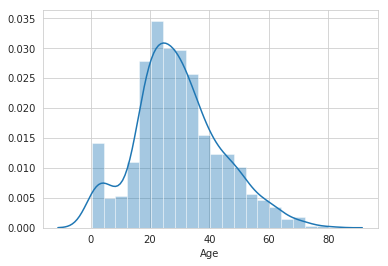

In [9]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

We see that the majority of the passengers are between 20-40, so we will use the median as an acceptable value to replace the null value in age column.

In [10]:
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna(0, inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


## Feature Visualization and Selection

Now that we have handled our null values and removed unnecessary data, lets see the relationship between data. 

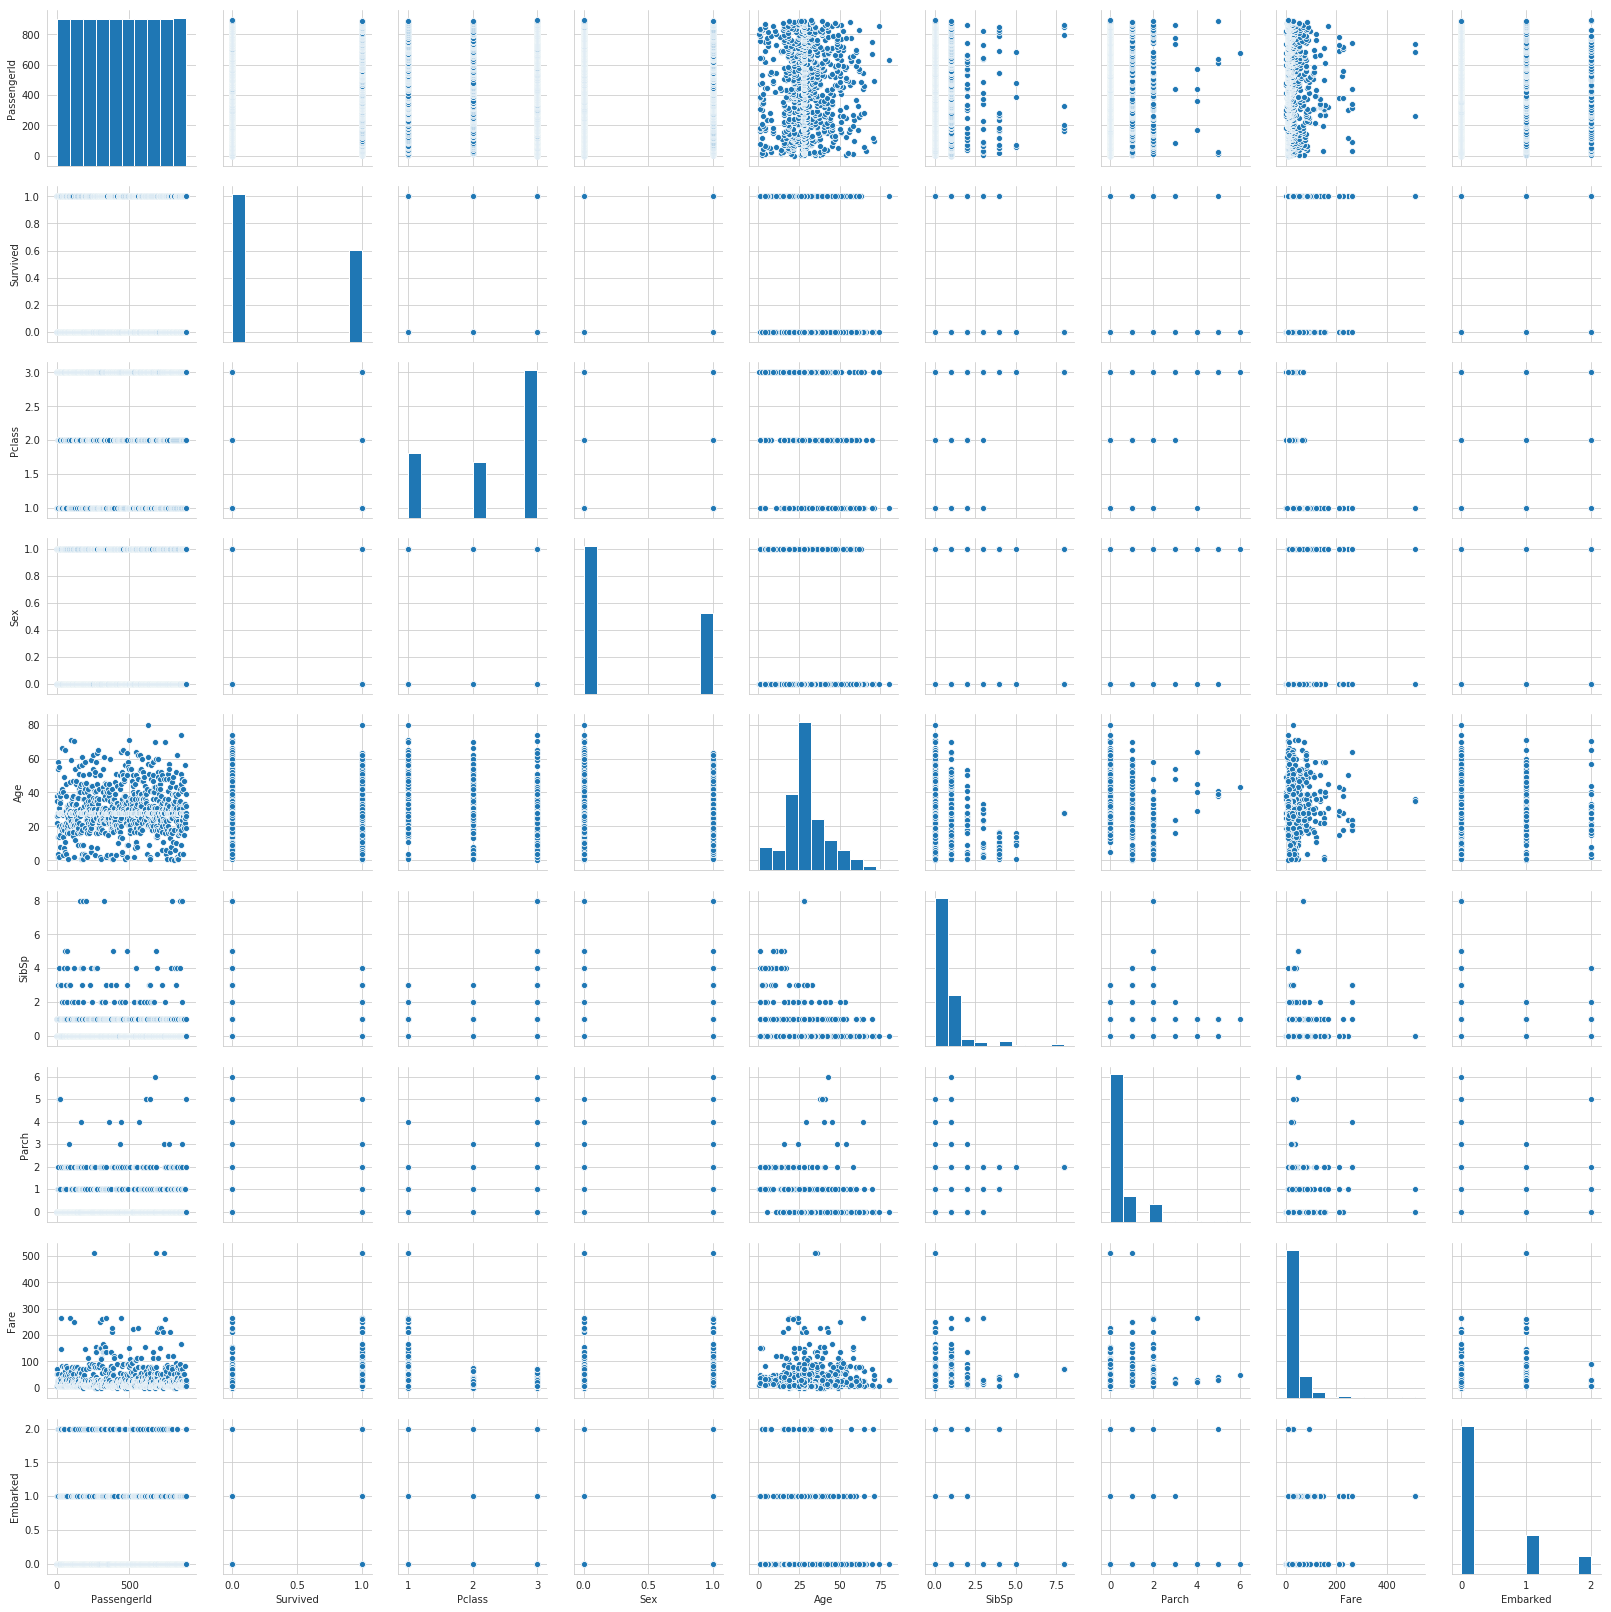

In [11]:
sns.pairplot(training)

Lets take a closer look at the percentage of survival between male (int 0) and female (int 1)

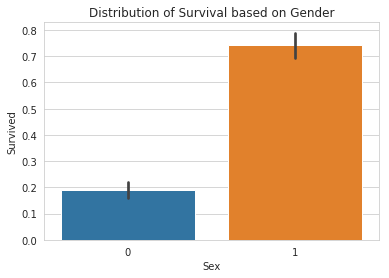

Total people survived is: 342
Proportion of Females who survived:
68.12865497076024 %
Proportion of Males who survived:
31.871345029239766 %


In [12]:
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == 1]["Survived"].sum()
total_survived_males = training[training.Sex == 0]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males) * 100, "%")
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males)*100,"%")

From the survivors, almost 70% were female versus male.

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

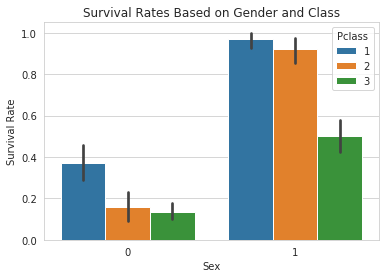

In [13]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

The chance of survival for first and second class also greatly increased the chance of making it out alive, but again more favorable for females vs males.

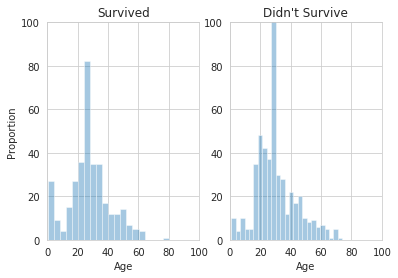

In [14]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.show()

We see that age alone isnt able to provide a well enough picture on the possibility of survival, so we decided to add several other data points and see if we see a better pattern.

Text(0.5, 0.98, 'Sex = 1 is Female and Sex = 0 is Male')

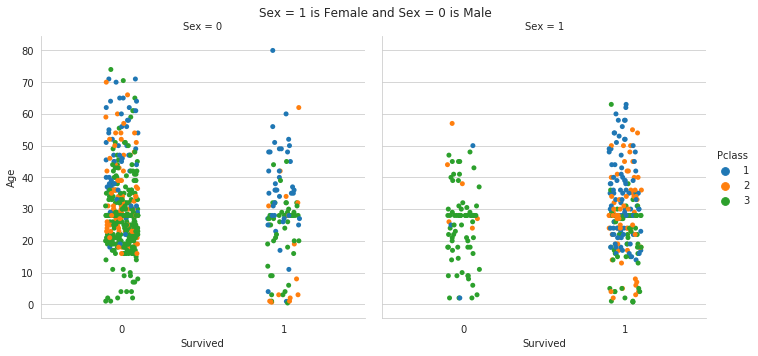

In [15]:
sns.catplot(x="Survived", y="Age", hue="Pclass", col = "Sex", data=training, jitter=True, kind="strip")
plt.subplots_adjust(top=0.9)
plt.suptitle("Sex = 1 is Female and Sex = 0 is Male")

## Classification Modeling

Importing LinearSVC, Random Forrest classifier, Logistic regression, K Nearest Neighbor, naive Gaussian and decision tree. We will apply our datasets for each and check which one will give us best acuracy.

In [0]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

To calculate accuracy of each model or algorithm

In [0]:
from sklearn.metrics import make_scorer, accuracy_score 

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare"]
X_train = training[features] #define training features set
y_train = training["Survived"] #define training label set
X_test = testing[features] #define testing features set
#we don't have y_test, that is what we're trying to predict with our model

By train_test_split we are splitting our datasets into two parts. One major part is for training and another part with small portion is for testing. Below we have splitted datasets in to 20% for testing and remaining 80% for our training.

In [0]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

Using Support Vector classifier and testing its accuracy. with our split data set

In [21]:
svc_clf = SVC() 
svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print(acc_svc)

0.6983240223463687


Using Linear Classifier and testing its accuracy

In [22]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print(acc_linsvc)

0.6871508379888268


Using Random Forest Classsifier and testing its accuracy

In [23]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.8379888268156425


Using Logistic Regression and checking its accuracy

In [24]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.7988826815642458


Using K-NN(K nearest Neighbor and testing its accuracy)

In [25]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

0.7318435754189944


Using Naive Gaussian and testing its accuracy

In [26]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.7877094972067039


Modeling with Decision Tree and testing its accuracy

In [27]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.8212290502793296


Using XGB classifier and testing its accuracy

In [29]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print(acc_xg)

0.8100558659217877


We are printing the accuracy of each model to know which model we will apply on our testing datasets.

In [30]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree", "XGBClassifier"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Accuracy,Model
2,0.837989,Random Forest
6,0.821229,Decision Tree
7,0.810056,XGBClassifier
3,0.798883,Logistic Regression
5,0.787709,Gaussian Naive Bayes
4,0.731844,K Nearest Neighbors
0,0.698324,SVC
1,0.687151,Linear SVC


After looking at the data we found that Random forest have maximum accuracy.

In [31]:
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Fitting out both training "train.csv" dataset which we engineered so far and testing dataset "test.csv"

In [32]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
submission_predictions =rf_clf.predict(X_test)

Creating New "submission.csv" for submission

In [34]:
submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("submission.csv", index=False)
print(submission.shape)

(418, 2)
